# Ensemble Learning & Advanced ML Models

# But how do I combine models?  Can I combine models and get better results?
Of course you can!

Consider this cow, how much do you think it weighs?
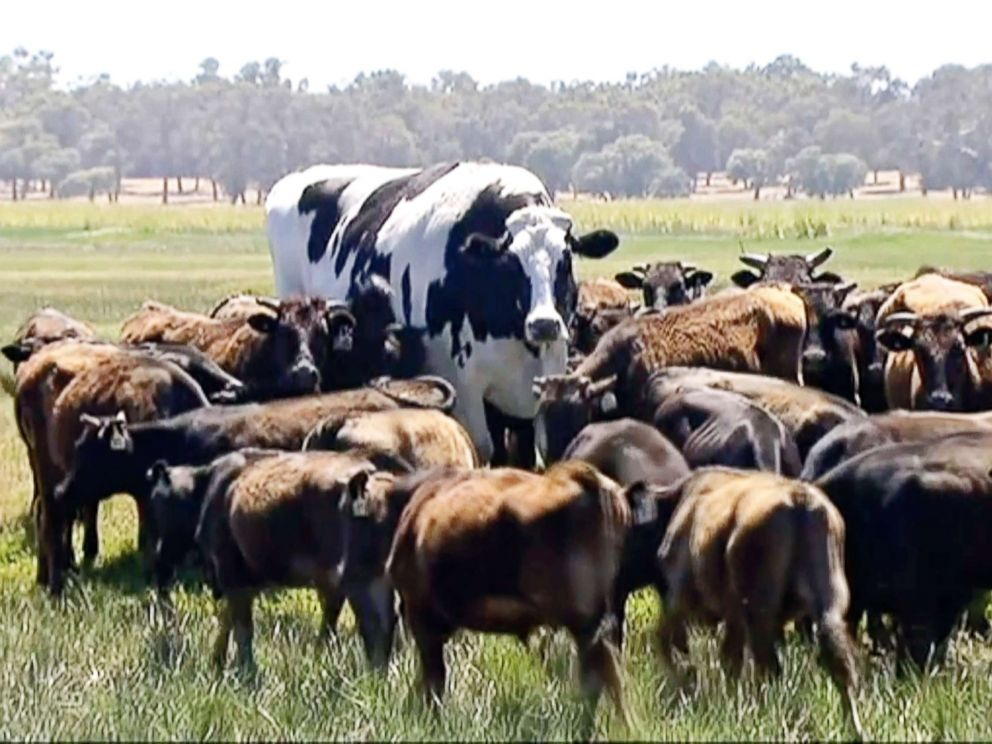

That's one big cow! 

# Basic and Advanced Ensemble Techniques

### Basic Techniques (Naive Techniques)

Let's define a labeled dataset as 
{($x_{i}, y_{i})$} $^{N}_{i=1} $

Where n is the size of the collection, $x_{i} $

is the *D* -dimensional feature vector of example *i* = 1, . . . . , N, 

$y_{i} $ is a real-valued target and every feature *x*$_i^{(j)} $ j = 1, . . . . , *D*, is also a real number

We define our training dataset *T*' to be a subset of our labeled dataset 
and define our validation dataset to be *V*' is also a subset of our labeled dataset

where $x_{i}$ cannot be in both *T*' and *V*'

#### Averaging
Build multiple models and average the results - **One model is good, more is better! **

Say we build models **M1**, **M2**, **M3** (each defined as function of $x_{i} $), we train each model on the training set, and average $y_{i}$

#### Weighted Average
Build multiple models and average the results, weighting the models - **Let's make our best model better!**

Say we build models **M1**, **M2**, **M3** (each defined as function of $x_{i} $), we train each model on the training set, and average $y_{i}$, but we weight these averages (with variable *z* where z can range between 0 and 1 and the $\sum(z)_{n}$ = 1 where n is the number of models)

#### Voting
Build multiple models and take the most popular result **Democracy to the help!**
Usually used on classification problems

Say we build models **M1**, **M2**, **M3** (each defined as function of $x_{i} $), we train each model on the training set, select the most common $y_{i}$


### Advanced Techniques 

Let's discuss our Weighted Average ensemble technique, what's an easy way to get the weights?

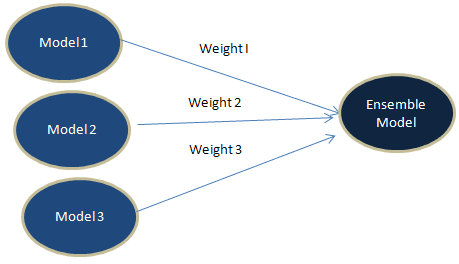

How about building a way to find the optimal weights, an optimization! A traditional way to handle this is to use a neural network with 1 node, the output will be the optimal combination of models. 

#### An example of a Kaggle Competition Winning Ensemble Solution

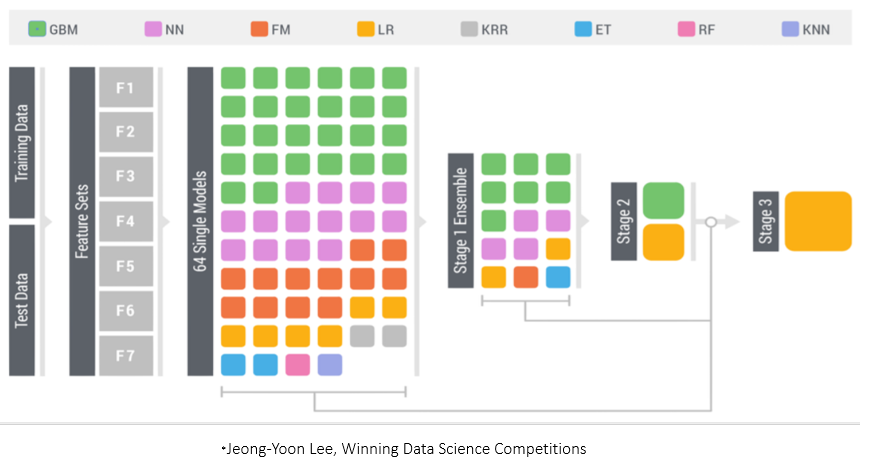

#### Stacking
Build multiple models on the training dataset *T*' and use predictions as a feature in a new model
Stacking is the most basic of advanced techniques, we use predictions as new features in building a new model ontop of the current model

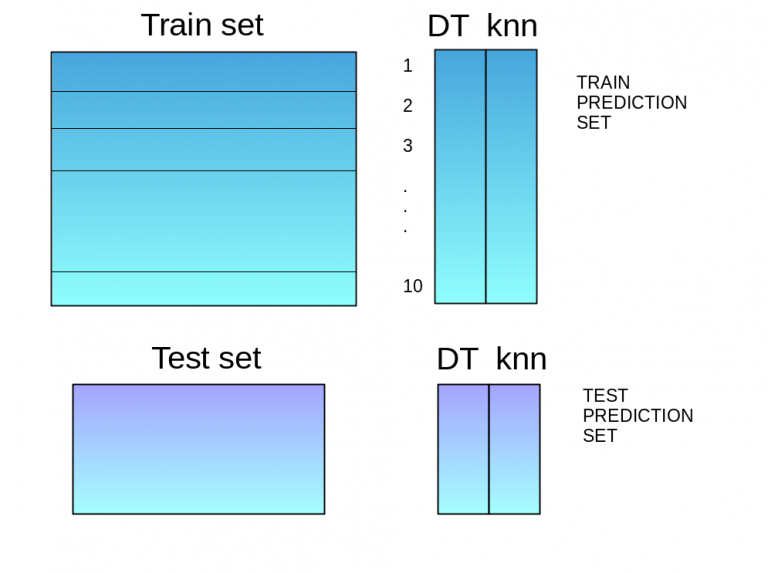

#### Blending
Build multiple models on the training dataset *T*' and use predictions on *V*' as a feature in a new model
Blending is very similar to stacking (some people consider them the same) and has comparable results. The largest benefit comes from preventing the model from preventing leakage.

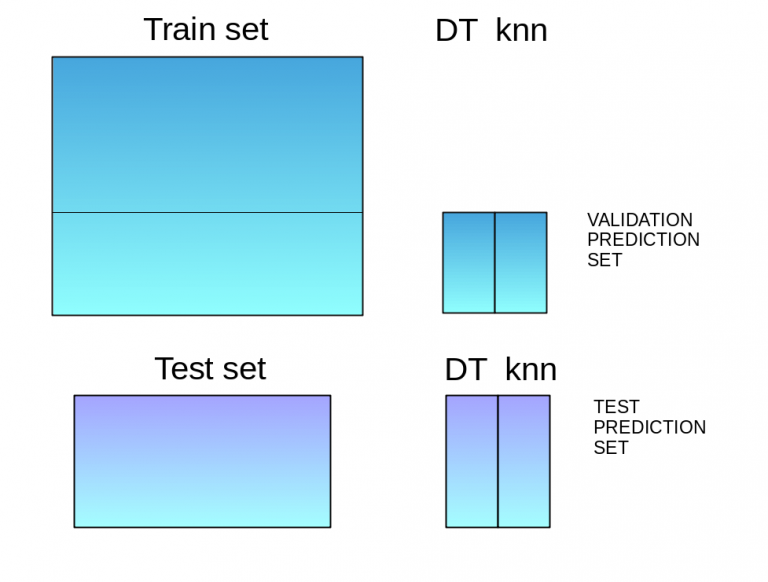

#### Bagging
Bootstrap Aggregation generates a new set of data *B*' which is a subset of *T*' by sampling from the training with replacement. This allows each model to be built on a different & random subset of the data and is how a Random Forest works!

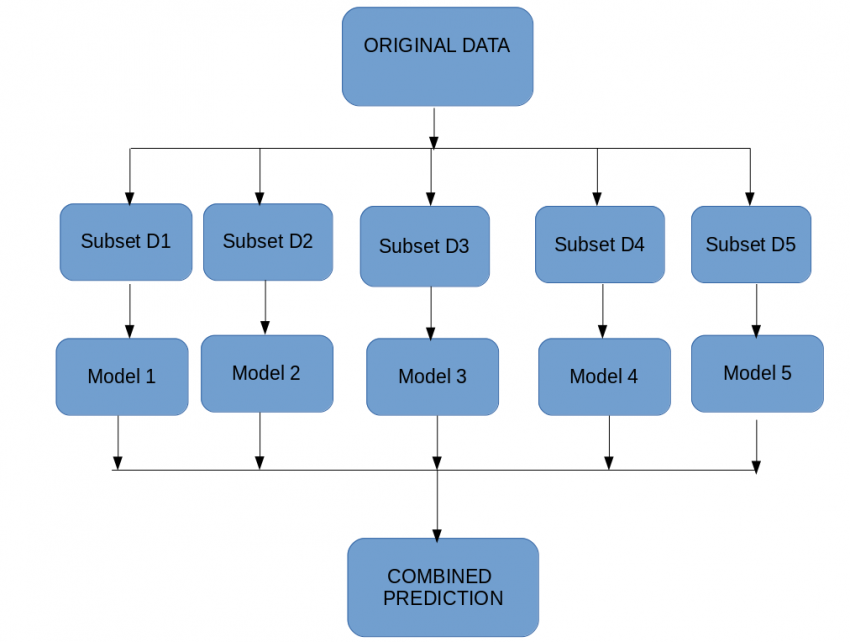

#### Boosting
Boosting is a process where each subsequent model is built on the residuals from the previous model. In this way the models learn more about the incorrect data points. Model after model is built correcting the error from the previous model.

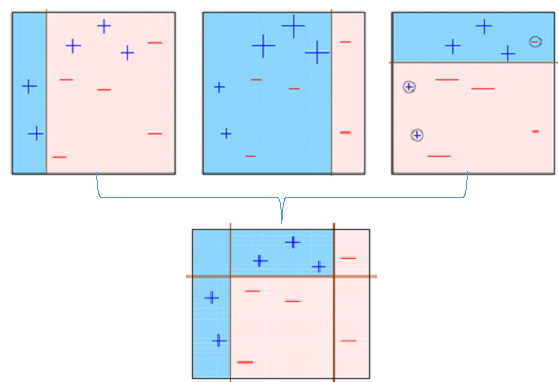

In [15]:
import numpy as np
from pandas import DataFrame
from sklearn.metrics import f1_score
from sklearn.datasets import load_iris

seed = 2017
np.random.seed(seed)

def f1(y, p): return f1_score(y, p, average='micro')

data = load_iris()
idx = np.random.permutation(150)
X = data.data[idx]
y = data.target[idx]

In [23]:
from mlens.ensemble import SuperLearner
import mlens
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# --- Build ---

# Passing a scoring function will create cv scores during fitting
# the scorer should be a simple function accepting to vectors and returning a scalar
ensemble = SuperLearner(scorer=f1, random_state=seed)

# Build the first layer
ensemble.add([RandomForestClassifier(random_state=seed), SVC()])

# Attach the final meta estimator
ensemble.add_meta(LogisticRegression())

# --- Use ---

# Fit ensemble
ensemble.fit(X[:75], y[:75])

# Predict
preds = ensemble.predict(X[75:])

/anaconda3/envs/bootcamp_05/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/bootcamp_05/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/bootcamp_05/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/envs/bootcamp_05/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better 

AttributeError: 'SuperLearner' object has no attribute 'scores_'

###### References
https://towardsdatascience.com/ensemble-methods-in-machine-learning-what-are-they-and-why-use-them-68ec3f9fef5f

https://www.analyticsvidhya.com/blog/2015/08/optimal-weights-ensemble-learner-neural-network/

https://www.analyticsvidhya.com/blog/2015/09/questions-ensemble-modeling/

https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/

https://medium.com/@rrfd/boosting-bagging-and-stacking-ensemble-methods-with-sklearn-and-mlens-a455c0c982de

https://blogs.sas.com/content/subconsciousmusings/2017/05/18/stacked-ensemble-models-win-data-science-competitions/#prettyPhoto

https://mlens.readthedocs.io/en/0.1.x/getting_started/#ensemble-guide